# Optimisasi Anggaran Biaya Pemasaran Y.Afisha


## Pendahuluan
Pemasaran merupakan salah satu elemen kunci dalam mengembangkan dan mempertahankan kehadiran perusahaan dalam pasar yang semakin kompetitif. Seiring dengan perubahan konstan dalam perilaku konsumen dan perkembangan teknologi, strategi pemasaran yang efektif telah menjadi semakin penting. Oleh karena itu, perusahaan Y.Afisha telah memberikan kesempatan kepada saya untuk mengikuti program magang di departemen analitik mereka.

Salah satu tugas pertama yang diberikan kepada saya selama program magang ini adalah membantu dalam mengoptimalkan anggaran biaya pemasaran perusahaan. Optimisasi anggaran pemasaran merupakan langkah strategis yang krusial dalam meningkatkan efisiensi dan efektivitas upaya pemasaran. Dengan mengalokasikan sumber daya secara bijak, perusahaan dapat mencapai hasil yang lebih baik, menciptakan nilai tambah, dan meminimalkan pemborosan sumber daya.

## Tujuan
Tujuan dari proyek sprint 7 ini adalah untuk mengidentifikasi, menganalisis, dan merekomendasikan cara terbaik untuk mengoptimalkan anggaran biaya pemasaran Y.Afisha. Dalam laporan proyek ini, saya akan menjelaskan pendekatan yang akan diambil, metodologi yang akan digunakan, serta manfaat yang diharapkan dari implementasi strategi optimisasi anggaran ini. Laporan ini juga akan mencakup analisis awal terhadap kebijakan dan praktik pemasaran yang telah ada, serta solusi yang diusulkan untuk mencapai hasil yang lebih baik.

## Tahapan
Berikut tahapan-tahapan yang akan kita lakukan dengan file path: `/datasets/visits_log_us.csv` , `/datasets/orders_log_us.csv` , `/datasets/costs_us.csv`

1. Memuat Data dan Mempersiapkan Data
2. Menyusun Laporan dan Hitung Metrik-Metrik yang Diperlukan
3. Tuliskan Kesimpulan ke Mana Saja Uang Tersebut Harus Diinvestasikan

--------------------

## Inisialisasi

- Import library yang kita butuhkan.

In [1]:
# list library yang digunakan
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

-------

## Memuat Data 

- Memuat data yang akan kita gunakan.

In [2]:
# Memuat datasets
visits_log = pd.read_csv('/datasets/visits_log_us.csv')
orders_log = pd.read_csv('/datasets/orders_log_us.csv')
costs_us = pd.read_csv('/datasets/costs_us.csv')

----------

## Mempersiapkan Data dan Memanipulasi Data

- Mari kita identifikasi data serta mengetahui apa saja isi data tersebut.

In [3]:
# Memeriksa informasi dataset visits_log
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


- Uid — ID pengguna
- Device — perangkat pengguna
- Start Ts — tanggal dan waktu dimulainya sesi
- End Ts — tanggal dan waktu berakhirnya sesi
- Source Id — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web

- <font color = green> Temuan </font>

Tidak ada data yang hilang. Kita dapat melihat bahwa tipe data masih kurang sesuai. Selain itu kita akan memanipulasi nama-nama kolom yang akan kita perbaiki, salah satunya yaitu mengubahnya menjadi lowercase serta mengubah cara penulisan menjadi snake_case.

In [4]:
# Mengubah nama kolom menjadi lowercase
visits_log.columns = visits_log.columns.str.lower()

# Mengganti spasi dengan underscore (snake_case)
visits_log.columns = visits_log.columns.str.replace(' ', '_')

In [5]:
# Memeriksa penulisan kolom
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
# mengubah tipe data tanggal yang sesuai
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])


In [7]:
# Memeriksa hasil perubahan tipe data
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
visits_log.head(10)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


--------------

In [9]:
# Memeriksa informasi dataset orders_log
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


- Uid — ID pengguna yang membuat pesanan
- Buy Ts — tanggal dan waktu pesanan dibuat
- Revenue — pendapatan Y.Afisha dari pesanan tersebut

- <font color = green> Temuan </font>

Tidak ada data yang hilang. Sama halnya dengan sebelumnya, kita akan memanipulasi dataset ini dengan sesuai.

In [10]:
# Mengubah nama kolom menjadi lowercase
orders_log.columns = orders_log.columns.str.lower()

# Mengganti spasi dengan underscore (snake_case)
orders_log.columns = orders_log.columns.str.replace(' ', '_')

In [11]:
# Memeriksa penulisan kolom
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
# Mengubah tipe data tanggal yang sesuai
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])


In [13]:
# Memeriksa hasil perubahan tipe data
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
orders_log.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


-----------

In [15]:
# Memeriksa informasi dataset costs_us
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


- source_id — ID sumber iklan
- dt — tanggal
- costs — pengeluaran untuk sumber iklan pada tanggal tersebut

- <font color = green> Temuan </font>

Tidak ada data yang hilang. Dari dataset tersebut, kita bisa melihat bahwa penulisan kolom sudah tepat. Kita hanya mengubah tipe data pada kolom `dt` ke `datetime`

In [16]:
costs_us['dt'] = pd.to_datetime(costs_us['dt'])

In [17]:
# Memeriksa hasil perubahan tipe data
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [18]:
costs_us.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


- <font color = green> Kesimpulan Sementara </font>

Beberapa tipe data dan penulisan kolom dan tipe data harus kita ubah agar mudah untuk dipanggil dan berjaga-jaga agar kita tidak harus memeriksa ulang/implementasi ulang untuk kepentingan analisis.

---------

## Menyusun Laporan dan Hitung Metrik-Metrik yang Diperlukan

- Disini kita akan mencangkup Produk, Penjualan dan Pemasaran.

### Produk
- Penyusunan laporan dan perhitungan metrik untuk produk

#### Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?

In [19]:
# Menghitung jumlah pengguna unik per hari, minggu, dan bulan
daily_users = visits_log['uid'].groupby(visits_log['start_ts'].dt.date).nunique()
weekly_users = visits_log['uid'].groupby(visits_log['start_ts'].dt.week).nunique()
monthly_users = visits_log['uid'].groupby(visits_log['start_ts'].dt.month).nunique()

# Menampilkan hasil
print("Jumlah pengguna unik per hari:")
print(daily_users)

print("\nJumlah pengguna unik per minggu:")
print(weekly_users)

print("\nJumlah pengguna unik per bulan:")
print(monthly_users)

/tmp/ipykernel_118/3731433303.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekly_users = visits_log['uid'].groupby(visits_log['start_ts'].dt.week).nunique()


Jumlah pengguna unik per hari:
start_ts
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64

Jumlah pengguna unik per minggu:
start_ts
1      6918
2      6703
3      6972
4      7060
5      8111
6      7908
7      7759
8      7518
9      7395
10     6844
11     6225
12     7898
13     4940
14     5383
15     5494
16     5740
17     5503
18     3916
19     4128
20     5070
21     4995
22     6867
23     4129
24     2812
25     2878
26     3064
27     3294
28     4355
29     3841
30     2655
31     2364
32     2444
33     2746
34     3116
35     3694
36     4412
37     4319
38     4874
39     6241
40     7612
41     7074
42     7148
43     7401
44     7480
45     7179
46     8117
47    10586
48     8166
49     8407
50     8214
51     7172
52     7774
Name: uid, dtype: int64

Jumlah pengguna unik p

- Mari kita buat visualisasi untuk 10 teratas dan 10 terbawah agar lebih mudah dibaca


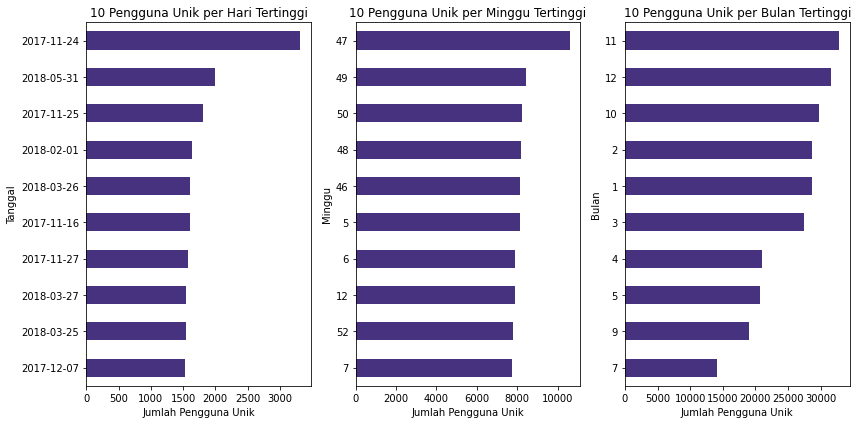

In [20]:
# Mengambil 10 data tertinggi
top_10_daily_largest = daily_users.nlargest(10)
top_10_weekly_largest = weekly_users.nlargest(10)
top_10_monthly_largest = monthly_users.nlargest(10)

# Mengatur palet warna Viridis
sns.set_palette("viridis")

# Membuat visualisasi
plt.figure(figsize=(12, 6))

# Visualisasi harian 
plt.subplot(131)
top_10_daily_largest.sort_values().plot(kind='barh', title='10 Pengguna Unik per Hari Tertinggi')
plt.ylabel('Tanggal')
plt.xlabel('Jumlah Pengguna Unik')

# Visualisasi mingguan
plt.subplot(132)
top_10_weekly_largest.sort_values().plot(kind='barh', title='10 Pengguna Unik per Minggu Tertinggi')
plt.ylabel('Minggu')
plt.xlabel('Jumlah Pengguna Unik')

# Visualisasi bulanan 
plt.subplot(133)
top_10_monthly_largest.sort_values().plot(kind='barh', title='10 Pengguna Unik per Bulan Tertinggi')
plt.ylabel('Bulan')
plt.xlabel('Jumlah Pengguna Unik')

plt.tight_layout()
plt.show()

- <font color = green>Kesimpulan Sementara  </font>

Puncak pengguna unik pada yang tertinggi berada di tanggal 24. Untuk pengguna unik mingguan, pada minggu ke 47 merupakan puncak tertinggi. Untuk pengguna bulanan, puncak jumlah pengguna unik berada di bulan 11.

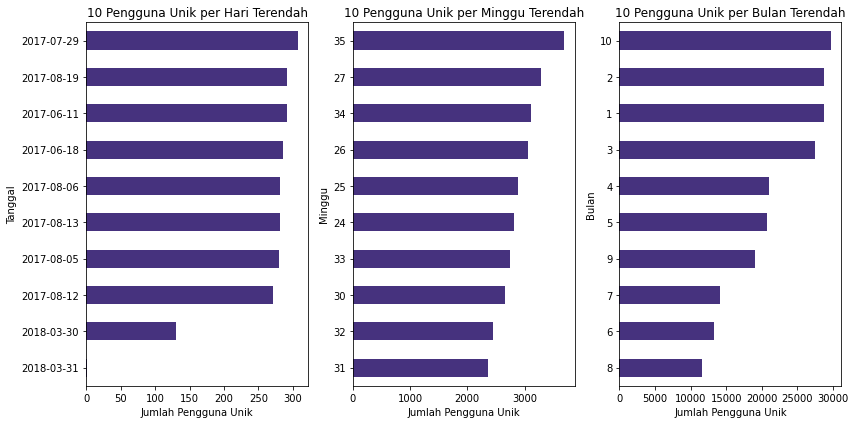

In [21]:
# Mengambil 10 data terbawah 
top_10_daily_smallest = daily_users.nsmallest(10)
top_10_weekly_smallest = weekly_users.nsmallest(10)
top_10_monthly_smallest = monthly_users.nsmallest(10)

# Mengatur palet warna Viridis
sns.set_palette("viridis")

# Membuat visualisasi
plt.figure(figsize=(12, 6))

# Visualisasi harian 
plt.subplot(131)
top_10_daily_smallest.plot(kind='barh', title='10 Pengguna Unik per Hari Terendah')
plt.ylabel('Tanggal')
plt.xlabel('Jumlah Pengguna Unik')

# Visualisasi mingguan
plt.subplot(132)
top_10_weekly_smallest.plot(kind='barh', title='10 Pengguna Unik per Minggu Terendah')
plt.ylabel('Minggu')
plt.xlabel('Jumlah Pengguna Unik')

# Visualisasi bulanan 
plt.subplot(133)
top_10_monthly_smallest.plot(kind='barh', title='10 Pengguna Unik per Bulan Terendah')
plt.ylabel('Bulan')
plt.xlabel('Jumlah Pengguna Unik')

plt.tight_layout()
plt.show()

- <font color = green>Kesimpulan Sementara  </font>

Untuk kategori terendah, pada bagian hari, tanggal 31 bulan 03 tidak ada pengguna sama sekali. Pada bagian mingguan, tepat di minggu ke 31 pengguna mencapai kurang dari 3000. Pada bagian bulanan tepat di bulan 8, pengguna mencapai dibawah 20000

-------------

#### Berapa Jumlah Sesi per Harinya? (satu pengguna mungkin saja memiliki lebih dari satu sesi).

- Kita akan kelompokan sesi per hari dan menghitung jumlah sesi per hari.

In [22]:
# Mengelompokkan sesi per hari dan menghitung jumlah sesi per hari
sessions_per_day = visits_log.groupby(visits_log['start_ts'].dt.date)['uid'].count().reset_index()

# Membuat DataFrame baru dengan nama kolom yang lebih deskriptif
sessions_df = pd.DataFrame({'Date': sessions_per_day['start_ts'], 'Session Count': sessions_per_day['uid']})

# Menampilkan DataFrame baru
sessions_df

,Date,Session Count
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


- Mari kita tampilkan visualisasi dari sessions_per_day dengan dataframe baru yaitu df_sessions. Kita akan mengambil 10 sample tertinggi dan 10 sample terendah.

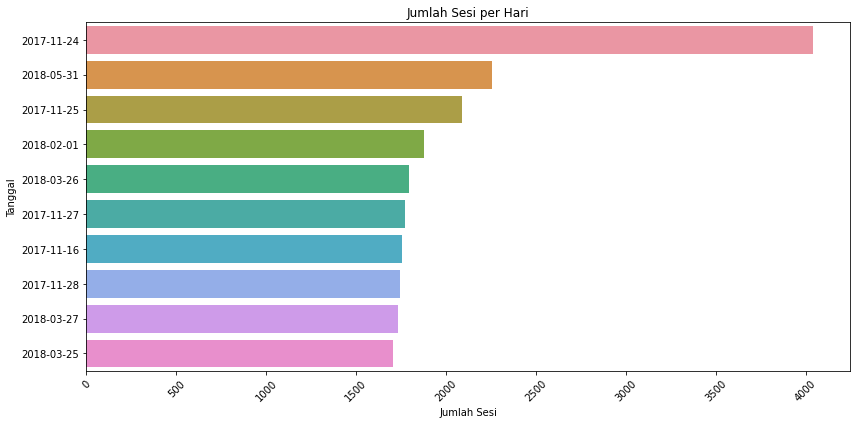

In [23]:
# Menampilkan 10 sesi per hari dari yang teretinggi
top_10_sessions_largest = sessions_df.nlargest(10, 'Session Count')
# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Session Count', y='Date', data=top_10_sessions_largest)
plt.title('Jumlah Sesi per Hari')
plt.xlabel('Jumlah Sesi')
plt.ylabel('Tanggal')

# Memutar label tanggal agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- <font color = green> Kesimpulan Sementara </font>

Pada tanggal 24 bulan 11 tahun 2017, pengguna tertinggi mencapai lebih dari 4000.

---------

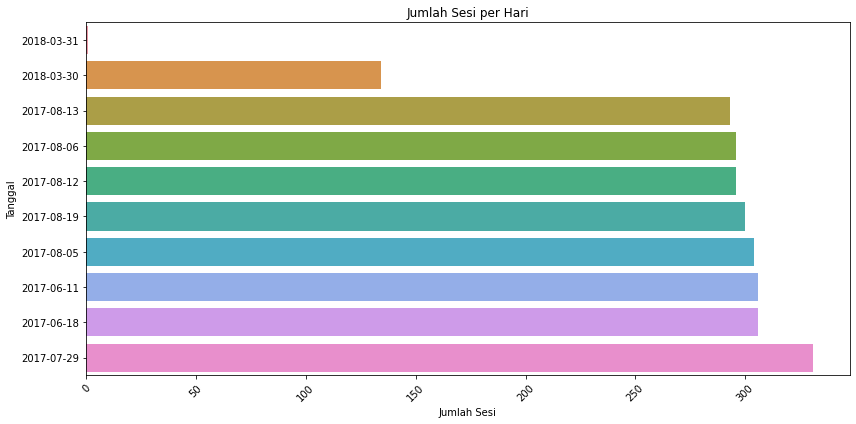

In [24]:
# Menampilkan 10 sesi per hari dari yang teretinggi
top_10_sessions_smallest = sessions_df.nsmallest(10, 'Session Count')
# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Session Count', y='Date', data=top_10_sessions_smallest)
plt.title('Jumlah Sesi per Hari')
plt.xlabel('Jumlah Sesi')
plt.ylabel('Tanggal')

# Memutar label tanggal agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- <font color = green> Kesimpulan Sementara </font>

Kita tidak memiliki data yang kosong ataupun yang hilang. Bisa kita lihat bahwa pada tanggal 31 bulan 03 tahun 2018. Terdapat irisan yang sangat kecil yang berarti hanya ada beberapa pengguna saja yang aktif di hari tersebut. Hari berikutnya tercatat berada di titik di atas 100 pengguna.

-----------

#### Berapa Lama Durasi Untuk Setiap Sesi?

Kita akan menggunakan durasi per sesi dalam satuan menit.

In [25]:
# Menghitung durasi setiap sesi (dalam menit)
visits_log['session_duration'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.total_seconds()/60


In [1]:
# Memeriksa kolom baru
visits_log.head(10)

NameError: name 'visits_log' is not defined

In [27]:
visits_log.head(50)

,device,end_ts,source_id,start_ts,uid,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,1.0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,56.0
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,1.0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,3.0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,1.0


- Kita telah menambahkan kolom baru yaitu session_duration dengan satuan menit. Sekarang kita akan ambil 10 sample tertinggi dan 10 sample terendah untuk lama durasi setiap sesi.

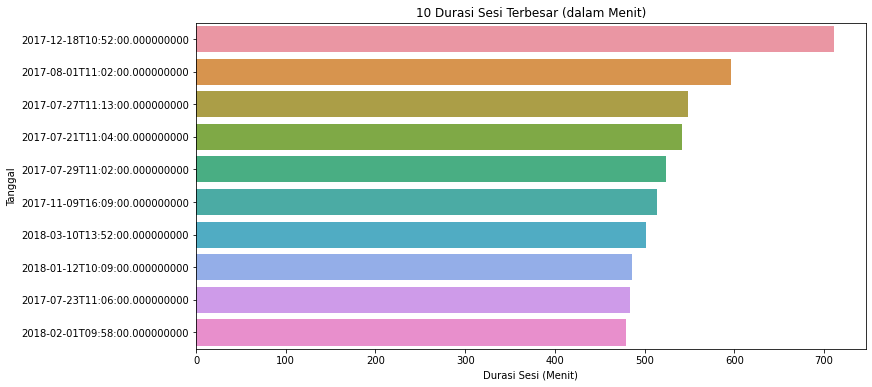

In [28]:
# Menampilkan 10 sesi per hari dari yang teretinggi
top_10_session_duration_largest = visits_log.nlargest(10, 'session_duration')

# Mengatur palet warna Seaborn
sns.set_palette("viridis")

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='session_duration', y='start_ts', data=top_10_session_duration_largest, orient='h')
plt.title('10 Durasi Sesi Terbesar (dalam Menit)')
plt.xlabel('Durasi Sesi (Menit)')
plt.ylabel('Tanggal')

plt.show()



- <font color = green> Kesimpulan Sementara </font>

Besar sesi yang kita miliki bisa saja pengguna dalam keadaan idle sehingga tidak melakukan aktivitas apapun.



-------

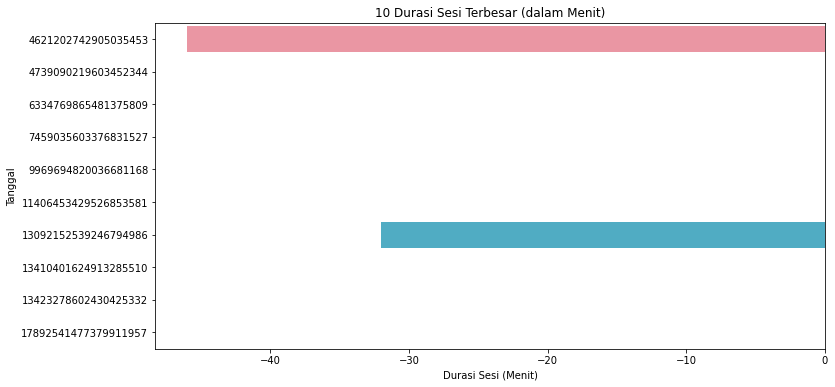

In [29]:
# Menampilkan 10 sesi per hari dari yang terendah
top_10_session_duration_smallest = visits_log.nsmallest(10, 'session_duration')

# Mengatur palet warna Seaborn
sns.set_palette("viridis")

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='session_duration', y='uid', data=top_10_session_duration_smallest, orient='h')
plt.title('10 Durasi Sesi Terbesar (dalam Menit)')
plt.xlabel('Durasi Sesi (Menit)')
plt.ylabel('Tanggal')

plt.show()


In [30]:
visits_log[visits_log['session_duration'] < 0]

,device,end_ts,source_id,start_ts,uid,session_duration
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,-32.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,-46.0


- <font color = green> Temuan </font>

Ternyata terdapat nilai outliers rendah yang sangat menjorok untuk mengetahui titik terendah dari durasi setiap sesi. Durasi sesi yang memiliki nilai negatif adalah sesuatu yang tidak mungkin dalam konteks sesi pengguna. Nilai negatif pada durasi sesi adalah anomali atau outliers yang perlu diperiksa lebih lanjut. Ini mungkin terjadi karena masalah dalam proses pencatatan atau pengumpulan data.

In [31]:
filtered_visits = visits_log.query('session_duration > 0')
# Mengambil 10 data terendah dari filtered_visits berdasarkan kolom session_duration
lowest_duration_visits = filtered_visits.nsmallest(10, 'session_duration')

In [32]:
lower_visits_sample = filtered_visits[filtered_visits['session_duration'] >= 0].head(10)

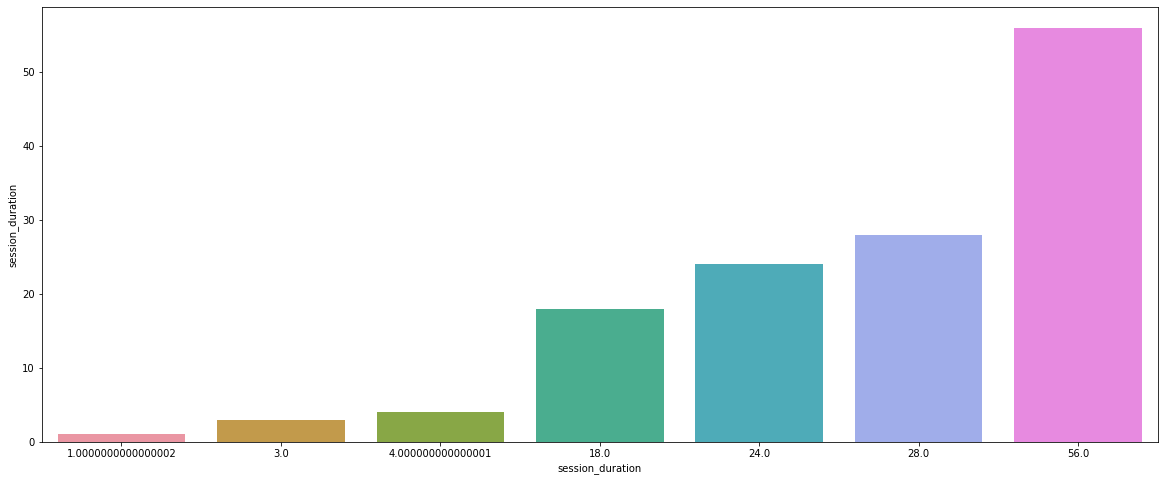

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(data = lower_visits_sample.sort_values(by='session_duration'), x = 'session_duration', y = 'session_duration' );

<font color = green> Kesimpulan Sementara </font>

Session Durasi 1 Menit: Session dengan durasi sekitar 1 menit mungkin menunjukkan bahwa pengguna hanya mengunjungi situs web atau aplikasi untuk waktu singkat dan kemudian keluar. Ini bisa jadi tanda bahwa pengguna tidak menemukan konten atau pengalaman yang menarik, atau mungkin mereka hanya mencari informasi singkat. Dalam hal ini, kita mungkin ingin mempertimbangkan untuk memperbaiki pengalaman pengguna atau mengevaluasi halaman yang kurang menarik.

-----------------

#### Seberapa Sering Pengguna Kembali untuk Menggunakan Produk?

In [34]:
# Mengidentifikasi pengguna pertama dan tanggal penggunaan pertama
first_usage = visits_log.groupby('uid')['start_ts'].min().reset_index()
first_usage.columns = ['uid', 'first_usage_date']

# Menghitung pengguna yang kembali dalam sehari setelah penggunaan pertama
first_usage['return'] = first_usage['uid'].isin(visits_log[(visits_log['start_ts'] - first_usage['first_usage_date']).dt.days == 1]['uid']).astype(int)

# Membuat first_usage sebagai DataFrame baru
first_usage_df = pd.DataFrame(first_usage)

# Mengukur retensi harian
retention_rate = first_usage_df['return'].mean() * 100


In [35]:
print(retention_rate,'%')

0.30416051260250077 %


In [36]:
# Mengidentifikasi pengguna pertama dan tanggal penggunaan pertama
first_usage = visits_log.groupby('uid')['start_ts'].min().reset_index()
first_usage.columns = ['uid', 'first_usage_date']

# Menghitung pengguna yang kembali dalam sebulan setelah penggunaan pertama
first_usage['return'] = first_usage['uid'].isin(visits_log[(visits_log['start_ts'] - first_usage['first_usage_date']).dt.days <= 30]['uid']).astype(int)

# Mengukur retensi bulanan
retention_rate = first_usage['return'].mean() * 100


In [37]:
print(retention_rate,'%')

42.90416314223229 %


----------

### Penjualan

- Di sini kita memeriksa besaran konversi terhadap pembelian pertama

#### Kapan Orang-Orang Mulai Melakukan Pembelian?

- Kita akan menggabungkan 2 dataset untuk kapan pengunjung itu datang dan kapan pengunjung itu membeli.

In [38]:
# Pembelian awal dengan methode groupby
first_orders_dates = orders_log.groupby('uid')['buy_ts'].min().reset_index()
first_visits_dates = visits_log.groupby('uid')['start_ts'].min().reset_index()

In [39]:
merged_data = pd.merge(first_visits_dates, first_orders_dates, on='uid', how='left')

# Menghitung selisih waktu antara tanggal kunjungan pertama dan tanggal pembelian pertama
merged_data['time_to_conversion'] = (merged_data['buy_ts'] - merged_data['start_ts']).dt.days


# Tampilkan hasil yang mencakup kolom-kolom yang Anda cari
result = merged_data[['uid','time_to_conversion','start_ts','buy_ts']]

In [40]:
result.tail(50)

,uid,time_to_conversion,start_ts,buy_ts
228119,18442776624034587523,NaN,2017-10-30 19:52:00,NaT
228120,18443183311828305996,NaN,2017-06-07 20:54:00,NaT
228121,18443224700696298135,NaN,2018-04-09 15:18:00,NaT
228122,18443250442441028636,NaN,2018-01-04 10:09:00,NaT
228123,18443337724797026724,NaN,2018-03-02 14:45:00,NaT
228124,18443423405535314281,NaN,2018-01-17 16:28:00,NaT
228125,18443632631343403513,NaN,2017-12-21 21:11:00,NaT
228126,18443807908611224376,NaN,2017-11-23 13:09:00,NaT
228127,18443833373482073752,NaN,2018-02-09 23:21:00,NaT
228128,18443855420066332460,NaN,2018-01-11 16:08:00,NaT


- <font color = green> Kesimpulan Sementara </font>

Interpretasi dari kolom `time_to_conversion` adalah selisih waktu dalam hari antara tanggal kunjungan pertama (start_ts) dan tanggal pembelian pertama (buy_ts) untuk setiap pengguna. 

Baris pertama:

- UID: 18445601152732270159
- Selisih waktu: 231.0 hari

Baris kedua:
- UID: 18445670737855705729
- Selisih waktu: NaN

Dalam baris pertama, pengguna dengan UID 18445601152732270159 melakukan pembelian 231 hari setelah kunjungan pertama mereka. Artinya, pengguna ini menjadi pelanggan (konversi) setelah 231 hari dari kunjungan pertama.

Sedangkan pada baris kedua, terdapat NaN pada kolom `time_to_conversion`, yang mengindikasikan bahwa pengguna dengan UID 18445670737855705729 tidak memiliki catatan pembelian dalam dataset. Ini mungkin berarti bahwa pengguna tersebut tidak pernah melakukan pembelian selama periode yang dicakup oleh data

Dengan kata lain, `time_to_conversion` mengukur seberapa lama waktu yang dibutuhkan oleh pengguna dari kunjungan pertama hingga melakukan pembelian pertama. Semakin kecil angka dalam kolom ini, semakin cepat konversi terjadi, sementara nilai NaN menunjukkan bahwa tidak ada konversi yang tercatat untuk pengguna tersebut.

- Mari kita tampilkan nilai tidak kosong untuk `time_to_conversion`

In [41]:
# Filter hanya baris data yang tidak memiliki NaN pada kolom time_to_conversion
non_nan_data = merged_data[pd.notna(merged_data['time_to_conversion'])]

# Tampilkan hasil yang mencakup kolom-kolom yang Anda cari
result = non_nan_data[['uid', 'time_to_conversion','start_ts','buy_ts']]

# Tampilkan 10 data pertama
result


,uid,time_to_conversion,start_ts,buy_ts
3,313578113262317,106.0,2017-09-18 22:49:00,2018-01-03 21:51:00
22,1575281904278712,0.0,2017-06-03 10:13:00,2017-06-03 10:13:00
35,2429014661409475,0.0,2017-10-11 17:14:00,2017-10-11 18:33:00
36,2464366381792757,0.0,2018-01-27 20:10:00,2018-01-28 15:54:00
38,2551852515556206,0.0,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...,...
228142,18445147675727495770,95.0,2017-08-20 13:30:00,2017-11-24 09:03:00
228143,18445407535914413204,0.0,2017-09-22 23:48:00,2017-09-22 23:55:00
228148,18445601152732270159,231.0,2017-08-07 11:51:00,2018-03-26 22:54:00
228161,18446156210226471712,103.0,2017-11-07 10:01:00,2018-02-18 19:34:00


- <font color = green> Kesimpulan Sementara </font>

Nilai 0 dalam kolom time_to_conversion, itu berarti bahwa pengguna tersebut telah melakukan konversi pada hari yang sama dengan pendaftaran atau sesi pertamanya. Dalam konteks analisis konversi, ini bisa diinterpretasikan sebagai konversi "seketika" di mana pengguna secara praktis menjadi pelanggan atau melakukan transaksi pada saat yang sama ketika mereka pertama kali mengunjungi atau mendaftar

In [42]:
# Mengambil 10 data teratas berdasarkan time_to_conversion
fastest_conversion = result.nlargest(24, 'time_to_conversion')



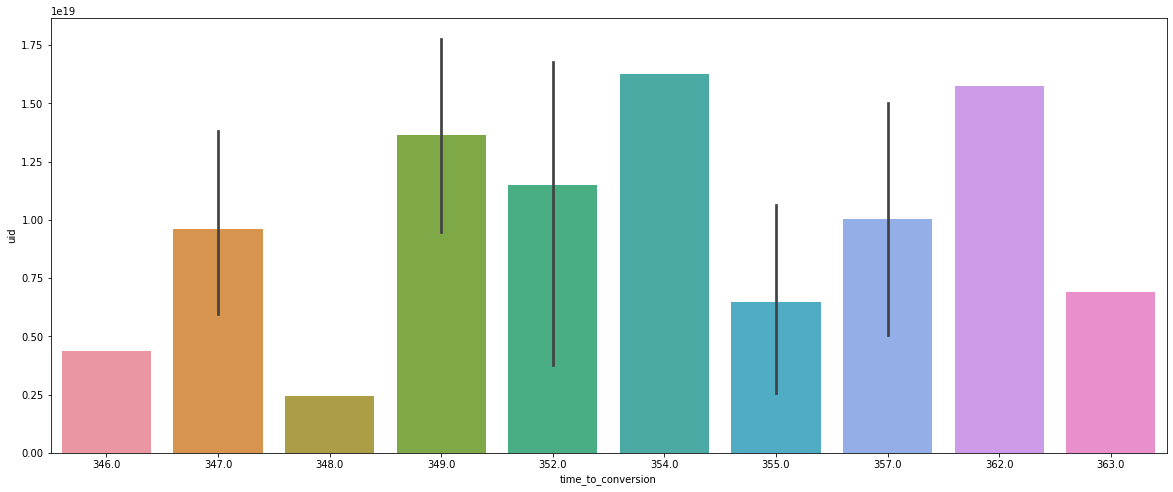

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(data = fastest_conversion.sort_values(by='time_to_conversion'), x = 'time_to_conversion', y = 'uid' );

- Berikut adalah konversi tercepat untuk sample yang tidak memiliki nilai NaN. Kita tidak perlu menunjukan yang rendahnya karena sudah jelas, rendahnya aktivitas bisa dipastikan pengguna hanya melakukan sedikit aktivitas.


-----------

#### Berapa Jumlah Pesanan yang Mereka untuk Selama Periode Waktu Tertentu?
- Mari kita tentukan pada tahun 2017 dan 2018

In [44]:
# Memeriksa tahun yang tersedia
orders_log.head(20)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [45]:
orders_log.tail(20)

,buy_ts,revenue,uid
50395,2018-05-31 23:01:00,0.24,8971807372263051413
50396,2018-05-31 23:01:00,1.16,4326846074047313748
50397,2018-05-31 23:02:00,7.33,10899818686660841329
50398,2018-05-31 23:03:00,2.75,17036314177686040355
50399,2018-05-31 23:04:00,7.33,3251741041959686640
50400,2018-05-31 23:13:00,6.72,11767206187037456942
50401,2018-05-31 23:14:00,0.30,5877288373018804921
50402,2018-05-31 23:29:00,2.75,656193162812616454
50403,2018-05-31 23:30:00,5.50,5300693976971713685
50404,2018-05-31 23:36:00,0.61,14926823272464019002


- <font color = green > Kesimpulan Sementara </font>

Dataset ini merupakan periode waktu 2017 - 2018

- Mari kita hitung periode 2017

In [46]:
# Filter data berdasarkan periode waktu (misalnya, harian)
start_date_2017_day = '2017-06-01 00:00:00'
end_date_2017_day = '2017-06-30 23:59:59'

filtered_orders_2017 = orders_log[(orders_log['buy_ts'] >= start_date_2017_day) & (orders_log['buy_ts'] <= end_date_2017_day)]

# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah pesanan
daily_orders_2017 = filtered_orders_2017.groupby(filtered_orders_2017['buy_ts'].dt.date)['uid'].count()

# Menampilkan hasil
print("Jumlah pesanan per hari:")
print(daily_orders_2017)

Jumlah pesanan per hari:
buy_ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
2017-06-06    198
2017-06-07    197
2017-06-08    181
2017-06-09    131
2017-06-10     42
2017-06-11     28
2017-06-12     30
2017-06-13     60
2017-06-14     53
2017-06-15     75
2017-06-16     70
2017-06-17     35
2017-06-18     20
2017-06-19     45
2017-06-20     45
2017-06-21     51
2017-06-22     63
2017-06-23     64
2017-06-24     53
2017-06-25     50
2017-06-26     72
2017-06-27     59
2017-06-28     80
2017-06-29     69
2017-06-30     82
Name: uid, dtype: int64


In [47]:
total_orders_2017 = daily_orders_2017.sum()
total_orders_2017

2354

- Mari kita hitung periode 2018

In [48]:
# Filter data berdasarkan periode waktu (misalnya, harian)
start_date_2018_day = '2018-05-01 00:00:00'
end_date_2018_day = '2018-05-30 23:59:59'

filtered_orders_2018 = orders_log[(orders_log['buy_ts'] >= start_date_2018_day) & (orders_log['buy_ts'] <= end_date_2018_day)]

# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah pesanan
daily_orders_2018 = filtered_orders_2018.groupby(filtered_orders_2018['buy_ts'].dt.date)['uid'].count()

# Menampilkan hasil
print("Jumlah pesanan per hari:")
print(daily_orders_2018)

Jumlah pesanan per hari:
buy_ts
2018-05-01     51
2018-05-02     58
2018-05-03     99
2018-05-04    107
2018-05-05     80
2018-05-06     90
2018-05-07    117
2018-05-08     93
2018-05-09     65
2018-05-10     99
2018-05-11    119
2018-05-12     70
2018-05-13     72
2018-05-14    102
2018-05-15    113
2018-05-16    159
2018-05-17    219
2018-05-18    183
2018-05-19    113
2018-05-20    115
2018-05-21    182
2018-05-22    168
2018-05-23    176
2018-05-24    132
2018-05-25    160
2018-05-26    102
2018-05-27    107
2018-05-28    188
2018-05-29    189
2018-05-30    208
Name: uid, dtype: int64


In [49]:
total_orders_2018 = daily_orders_2018.sum()
total_orders_2018

3736

<font color = green > Kesimpulan Sementara</font>

- Jumlah pesanan yang dicapai 2018 lebih besar dari 2017.

---------

#### Berapa Besaran Rata-Rata Pembeliannya?

- Kita akan menghitung per periode berapa revenue rata-rata

In [50]:
# Memeriksa data orders_log
orders_log.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [51]:
# Filter data berdasarkan tahun pembelian
orders_2017 = orders_log[orders_log['buy_ts'].dt.year == 2017]
orders_2018 = orders_log[orders_log['buy_ts'].dt.year == 2018]

# Hitung rata-rata pembelian untuk tahun 2017 dan 2018
average_purchase_2017 = orders_2017['revenue'].mean()
average_purchase_2018 = orders_2018['revenue'].mean()
average_purchase = orders_log['revenue'].mean()

print("Besaran rata-rata pembelian :", average_purchase)
print("Besaran rata-rata pembelian tahun 2017:", average_purchase_2017)
print("Besaran rata-rata pembelian tahun 2018:", average_purchase_2018)


Besaran rata-rata pembelian : 4.999646930477041
Besaran rata-rata pembelian tahun 2017: 5.120598536425528
Besaran rata-rata pembelian tahun 2018: 4.8548771134739415


<font color = green> Kesimpulan Sementara </font>

- Rata-rata pembelian tahun 2017 lebih besar dari tahun 2018.

------

#### Berapa Jumlah Uang yang Mereka Kontribusikan? (LTV)

- Kita akan melakukan jumlah LTV dengan cara total_revenue dibagi dengan total_customers

In [52]:
# Hitung total pendapatan dari seluruh pelanggan
total_revenue = orders_log['revenue'].sum()

# Hitung jumlah pelanggan unik
total_customers = orders_log['uid'].nunique()

# Hitung Lifetime Value (LTV)
ltv = total_revenue / total_customers



print("Lifetime Value (LTV) dari seluruh pelanggan:", ltv)

Lifetime Value (LTV) dari seluruh pelanggan: 6.9013279303452615


<font color = green > Kesimpulan Sementara </font>

- Lifetime Value (LTV) dari seluruh pelanggan: 6.9013279303452615

--------

### Pemasaran

- Di sini kita akan menentukan jumlah uang yang dihabiskan, CaC(Customer Acquisition Cost), dan ROI(Return of Investment) 

#### Berapa Jumlah Uang yang Dihabiskan? (keseluruhan/per sumber/dari waktu ke waktu)
- Kita akan pisah perhitungan tersebut

In [53]:
# Informasi dataset
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [54]:
# Menghitung jumlah keseluruhan, sumber 
total_costs = costs_us['costs'].sum()
costs_per_source = costs_us.groupby('source_id')['costs'].sum()
print("Jumlah uang yang dihabiskan per sumber:")
print(costs_per_source)
print('==========================================================')
print("Total uang yang dihabiskan secara keseluruhan:", total_costs)

Jumlah uang yang dihabiskan per sumber:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64
Total uang yang dihabiskan secara keseluruhan: 329131.62


In [55]:
costs_us['week'] = costs_us['dt'].dt.isocalendar().week
costs_us['month'] = costs_us['dt'].dt.month
costs_us['year'] = costs_us['dt'].dt.year

In [56]:
weekly_costs = costs_us.groupby(['year', 'week'])['costs'].sum()
monthly_costs = costs_us.groupby(['year', 'month'])['costs'].sum()
yearly_costs = costs_us.groupby('year')['costs'].sum()

In [57]:
weekly_costs

year  week
2017  22       2668.46
      23       5372.71
      24       3462.49
      25       3821.75
      26       3562.67
      27       4158.44
      28       4914.08
      29       4592.82
      30       3090.33
      31       2968.57
      32       2677.79
      33       3687.70
      34       3460.92
      35       4151.71
      36       5518.02
      37       5420.00
      38       5157.70
      39       7766.12
      40       9241.87
      41       7313.35
      42       7472.47
      43       9032.89
      44       8504.86
      45       7372.95
      46       7958.02
      47      10556.10
      48       8839.08
      49       9209.11
      50      10861.58
      51       7093.08
      52       8053.51
2018  1        8067.81
      2        6855.05
      3        7913.74
      4        7174.12
      5        8130.57
      6        9046.91
      7        8310.46
      8        8080.77
      9        6508.32
      10       7898.69
      11       6633.53
      12       7229.85


Text(0.5, 0, 'Total Costs')

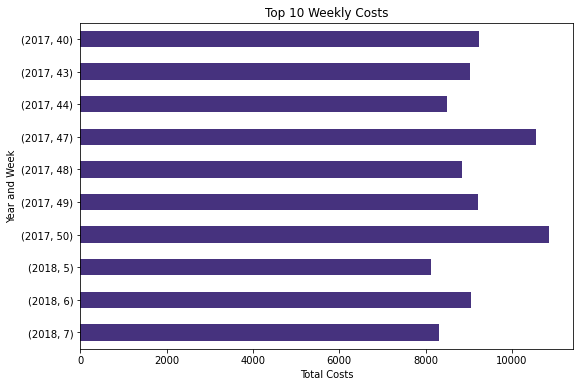

In [58]:
# Visualisasi data mingguan
plt.figure(figsize=(30, 6))
plt.subplot(131)
weekly_costs.nlargest(10).sort_index(ascending = False).plot(kind='barh', title='Top 10 Weekly Costs')
plt.ylabel('Year and Week')
plt.xlabel('Total Costs')


In [59]:
monthly_costs

year  month
2017  6        18015.00
      7        18240.59
      8        14790.54
      9        24368.91
      10       36322.88
      11       37907.88
      12       38315.35
2018  1        33518.52
      2        32723.03
      3        30415.27
      4        22289.38
      5        22224.27
Name: costs, dtype: float64

Text(0.5, 0, 'Total Costs')

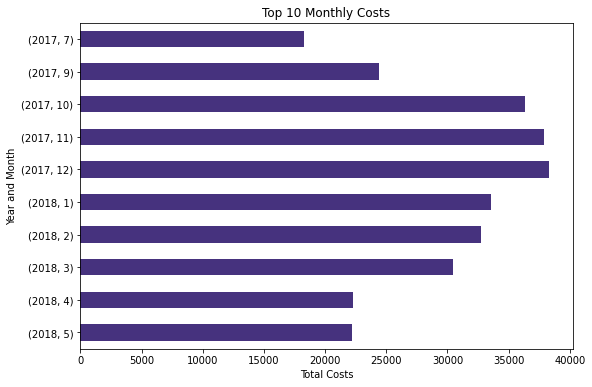

In [60]:
# Visualisasi data bulanan 
plt.figure(figsize=(30, 6))
plt.subplot(132)
monthly_costs.nlargest(10).sort_index(ascending=False).plot(kind='barh', title='Top 10 Monthly Costs')
plt.ylabel('Year and Month')
plt.xlabel('Total Costs')


In [61]:
yearly_costs

year
2017    187961.15
2018    141170.47
Name: costs, dtype: float64

Text(0.5, 0, 'Total Costs')

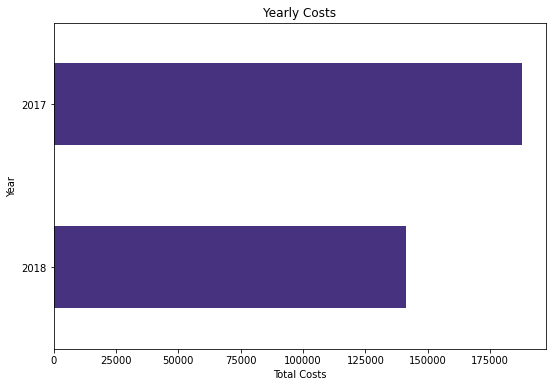

In [62]:
# Visualisasi data tahunan 
plt.figure(figsize=(30, 6))
plt.subplot(133)
yearly_costs.sort_index(ascending=False).plot(kind='barh', title='Yearly Costs')
plt.ylabel('Year')
plt.xlabel('Total Costs')

- <font color = green> Kesimpulan Sementara </font>

Banyak total uang yang dihabiskan berada pada tahun 2017.

----------

#### Berapa Biaya Akuisisi Pelanggan dari Masing-Masing Sumber? (CaC)

-  CaC dari masing-masing sumber pemasaran dengan menggabungkan dataset orders_log dan costs_us.

In [63]:
# Memeriksa informasi
orders_log

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [64]:
# Memeriksa informasi
costs_us

,source_id,dt,costs,week,month,year
0,1,2017-06-01,75.20,22,6,2017
1,1,2017-06-02,62.25,22,6,2017
2,1,2017-06-03,36.53,22,6,2017
3,1,2017-06-04,55.00,22,6,2017
4,1,2017-06-05,57.08,23,6,2017
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,21,5,2018
2538,10,2018-05-28,21.26,22,5,2018
2539,10,2018-05-29,11.32,22,5,2018
2540,10,2018-05-30,33.15,22,5,2018


In [65]:
# Ekstrak tahun dan bulan dari kolom 'buy_ts'
orders_log['year'] = orders_log['buy_ts'].dt.year
orders_log['month'] = orders_log['buy_ts'].dt.month

# Gabungkan dataset orders_log dan costs_us berdasarkan tahun dan bulan
merged_data_cac = pd.merge(orders_log, costs_us, how='inner', on=['year', 'month'])

# Menghitung total biaya pemasaran per sumber
cac_by_source = merged_data_cac.groupby('source_id')['costs'].sum()

# Menghitung jumlah pelanggan yang diakuisisi per sumber
customers_acquired_by_source = merged_data_cac.groupby('source_id')['uid'].nunique()

# Menghitung CaC per sumber
cac_by_source = cac_by_source / customers_acquired_by_source

In [66]:
cac_by_source

source_id
1      2636.945842
2      5422.036466
3     17901.711152
4      7582.534279
5      6543.035549
9       698.542467
10      735.368479
dtype: float64

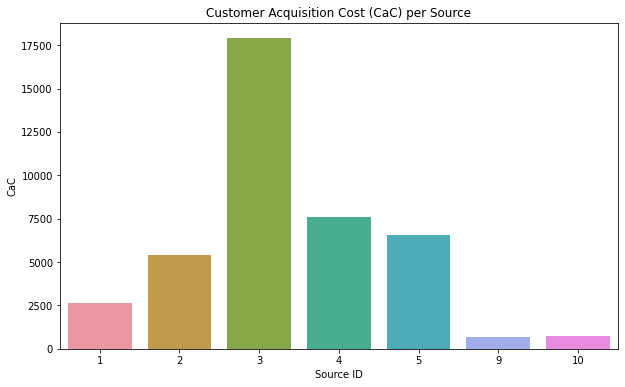

In [67]:
# Data CaC per sumber
cac_by_source = {
    1: 2636.945842,
    2: 5422.036466,
    3: 17901.711152,
    4: 7582.534279,
    5: 6543.035549,
    9: 698.542467,
    10: 735.368479
}

# Membuat DataFrame dari data CaC
cac_df = pd.DataFrame(list(cac_by_source.items()), columns=['source_id', 'CaC'])

# Mengatur palet warna Seaborn (Opsional)
sns.set_palette("viridis")

# Membuat visualisasi barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=cac_df, x='source_id', y='CaC')
plt.title('Customer Acquisition Cost (CaC) per Source')
plt.xlabel('Source ID')
plt.ylabel('CaC')
plt.xticks(rotation=0)

# Menampilkan visualisasi
plt.show()

- <font color = green> Kesimpulan Sementara </font>

Source ID 3 memiliki CaC sangat tinggi. Hal ini kurang baik karena Customer Acquisition Cost yaitu digunakan untuk rata-rata yang digunakan untuk melakukan akuisisi per customer. Semakin kecil maka semakin baik. 


----------

#### Seberapa Menguntungkannya Investasi Tersebut? (ROI)
- Dari sini kita akan menentukan apakah Return on Investment berada di titik positif atau negatif.

In [68]:
# Total Pendapatan (Total Revenue)
total_revenue = orders_log['revenue'].sum()

# Total Biaya Akuisisi Pelanggan (Total CaC) per sumber
total_cac_by_source = costs_us.groupby('source_id')['costs'].sum()

# Total Biaya Akuisisi Pelanggan (Total CaC)
total_cac = total_cac_by_source.sum()

# Menghitung ROI
roi = ((total_revenue - total_cac) / total_cac) * 100

print(f'ROI (Return on Investment): {roi:.2f}%')

ROI (Return on Investment): -23.42%


- <font color = green> Kesimpulan </font>

Return on Investment masih belum balik modal. Hal ini ROI yang dihasilkan yaitu -23.42%.

----------


## Kesimpulan Umum

- Beberapa tipe data dan penulisan kolom dan tipe data harus kita ubah agar mudah untuk dipanggil dan berjaga-jaga agar kita tidak harus memeriksa ulang/implementasi ulang untuk kepentingan analisis.
- Puncak pengguna unik pada yang tertinggi berada di tanggal 24. Untuk pengguna unik mingguan, pada minggu ke 47 merupakan puncak tertinggi. Untuk pengguna bulanan, puncak jumlah pengguna unik berada di bulan 11.
- Untuk kategori terendah, pada bagian hari, tanggal 31 bulan 03 tidak ada pengguna sama sekali. Pada bagian mingguan, tepat di minggu ke 31 pengguna mencapai kurang dari 3000. Pada bagian bulanan tepat di bulan 8, pengguna mencapai dibawah 20000
- Pada tanggal 24 bulan 11 tahun 2017, pengguna tertinggi mencapai lebih dari 4000.
- Kita tidak memiliki data yang kosong ataupun yang hilang. Bisa kita lihat bahwa pada tanggal 31 bulan 03 tahun 2018. Terdapat irisan yang sangat kecil yang berarti hanya ada beberapa pengguna saja yang aktif di hari tersebut. Hari berikutnya tercatat berada di titik di atas 100 pengguna.
- Besar sesi yang kita miliki bisa saja pengguna dalam keadaan idle sehingga tidak melakukan aktivitas apapun.
- Session Durasi 1 Menit: Session dengan durasi sekitar 1 menit mungkin menunjukkan bahwa pengguna hanya mengunjungi situs web atau aplikasi untuk waktu singkat dan kemudian keluar. Ini bisa jadi tanda bahwa pengguna tidak menemukan konten atau pengalaman yang menarik, atau mungkin mereka hanya mencari informasi singkat. Dalam hal ini, kita mungkin ingin mempertimbangkan untuk memperbaiki pengalaman pengguna atau mengevaluasi halaman yang kurang menarik.
- Interpretasi dari kolom time_to_conversion adalah selisih waktu dalam hari antara tanggal kunjungan pertama (start_ts) dan tanggal pembelian pertama (buy_ts) untuk setiap pengguna.
- Nilai 0 dalam kolom time_to_conversion, itu berarti bahwa pengguna tersebut telah melakukan konversi pada hari yang sama dengan pendaftaran atau sesi pertamanya. Dalam konteks analisis konversi, ini bisa diinterpretasikan sebagai konversi "seketika" di mana pengguna secara praktis menjadi pelanggan atau melakukan transaksi pada saat yang sama ketika mereka pertama kali mengunjungi atau mendaftar.
- Dataset ini merupakan periode waktu 2017 - 2018.
- Jumlah pesanan yang dicapai 2018 lebih besar dari 2017.
- Rata-rata pembelian tahun 2017 lebih besar dari tahun 2018.
- Lifetime Value (LTV) dari seluruh pelanggan: 6.9013279303452615.
- Banyak total uang yang dihabiskan berada pada tahun 2017.
- Source ID 3 memiliki CaC sangat tinggi. Hal ini kurang baik karena Customer Acquisition Cost yaitu digunakan untuk rata-rata yang digunakan untuk melakukan akuisisi per customer. Semakin kecil maka semakin baik.